#### Problem Statement

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

#### A brief understanding of the HR industry

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.

#### Understanding the Problem Statement

In this project,you are supposed to identify how salary is varying with respect to other considerable factors.

#### Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

#### Reading the Data.

In [2]:
df=pd.read_csv('G:/OS work/Files/New_data_set.csv')
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


#### Removing columns that are of no use for our analysis

In [3]:
# Here Gender,Calls,opening balance,closing balance are of no use for predicting a salary of an employee
df=df.drop(['Gender','Calls','openingbalance','closingbalance','Rating'],axis=1)
df.head()


,Business,Dependancies,Type,Billing,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,low,Unit_Sales,Total_Sales,Months,Education
0,0,No,Month-to-month,No,18,5089.00,2035.600,254.4500,3.77,21226600,3.65,18.25,18.8,0,High School or less
1,0,No,Month-to-month,No,19,5698.12,2279.248,284.9060,3.74,10462800,3.65,18.40,18.85,0,High School or less
2,0,No,Month-to-month,Yes,22,5896.65,2358.660,294.8325,3.89,18761000,3.72,18.70,18.9,0,High School or less
3,1,No,Month-to-month,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,3.83,18.75,19,0,High School or less
4,0,No,Month-to-month,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.08,18.80,19.05,1,High School or less


#### Percentage of Missing Values if there are any

In [4]:
(df.isnull().sum()/df.shape[0])*100

# Here we can see that Base_pay and Total_sales are having some missing values
# But since their percentage is very less(<1%),removing them won't affect our analysis.

Business        0.00
Dependancies    0.00
Type            0.00
Billing         0.00
Age             0.00
Salary          0.00
Base_pay        0.46
Bonus           0.00
Unit_Price      0.00
Volume          0.00
low             0.00
Unit_Sales      0.00
Total_Sales     0.16
Months          0.00
Education       0.00
dtype: float64

#### Removing a rows that contains missing values

In [5]:
df=df.dropna(axis=0)

In [6]:
# Again checking for null values
# As we can see that there are no longer any null values
df.isnull().sum()

Business        0
Dependancies    0
Type            0
Billing         0
Age             0
Salary          0
Base_pay        0
Bonus           0
Unit_Price      0
Volume          0
low             0
Unit_Sales      0
Total_Sales     0
Months          0
Education       0
dtype: int64

#### Getting the infomation of data to see if type of each column is in their respective types

In [7]:
df.info()

# So all the columns except Total Sales are in their respective types ,Total Sales need to change its type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Business      4969 non-null   int64  
 1   Dependancies  4969 non-null   object 
 2   Type          4969 non-null   object 
 3   Billing       4969 non-null   object 
 4   Age           4969 non-null   int64  
 5   Salary        4969 non-null   float64
 6   Base_pay      4969 non-null   float64
 7   Bonus         4969 non-null   float64
 8   Unit_Price    4969 non-null   float64
 9   Volume        4969 non-null   int64  
 10  low           4969 non-null   float64
 11  Unit_Sales    4969 non-null   float64
 12  Total_Sales   4969 non-null   object 
 13  Months        4969 non-null   int64  
 14  Education     4969 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 621.1+ KB


In [8]:
# Changing dtype of Total Sales to numeric
df['Total_Sales']=pd.to_numeric(df['Total_Sales'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Business      4969 non-null   int64  
 1   Dependancies  4969 non-null   object 
 2   Type          4969 non-null   object 
 3   Billing       4969 non-null   object 
 4   Age           4969 non-null   int64  
 5   Salary        4969 non-null   float64
 6   Base_pay      4969 non-null   float64
 7   Bonus         4969 non-null   float64
 8   Unit_Price    4969 non-null   float64
 9   Volume        4969 non-null   int64  
 10  low           4969 non-null   float64
 11  Unit_Sales    4969 non-null   float64
 12  Total_Sales   4961 non-null   float64
 13  Months        4969 non-null   int64  
 14  Education     4969 non-null   object 
dtypes: float64(7), int64(4), object(4)
memory usage: 621.1+ KB


#### Correlation among all the features

In [9]:
df.corr()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,low,Unit_Sales,Total_Sales,Months
Business,1.000000,-0.006536,-0.009957,-0.010292,-0.009957,0.002491,0.018015,-0.000328,-0.019784,-0.018937,-0.012542
Age,-0.006536,1.000000,0.279885,0.280143,0.279885,0.188225,-0.036191,0.249499,0.178914,0.141155,0.123007
Salary,-0.009957,0.279885,1.000000,0.999300,1.000000,0.596926,-0.209287,0.812699,0.940667,0.892530,0.602385
Base_pay,-0.010292,0.280143,0.999300,1.000000,0.999300,0.599108,-0.208833,0.815711,0.939539,0.893429,0.603124
Bonus,-0.009957,0.279885,1.000000,0.999300,1.000000,0.596926,-0.209287,0.812699,0.940667,0.892530,0.602385
Unit_Price,0.002491,0.188225,0.596926,0.599108,0.596926,1.000000,-0.045590,0.832366,0.520708,0.658016,0.443385
Volume,0.018015,-0.036191,-0.209287,-0.208833,-0.209287,-0.045590,1.000000,-0.146349,-0.216849,-0.183945,-0.124457
low,-0.000328,0.249499,0.812699,0.815711,0.812699,0.832366,-0.146349,1.000000,0.748120,0.896432,0.607442
Unit_Sales,-0.019784,0.178914,0.940667,0.939539,0.940667,0.520708,-0.216849,0.748120,1.000000,0.896115,0.481687
Total_Sales,-0.018937,0.141155,0.892530,0.893429,0.892530,0.658016,-0.183945,0.896432,0.896115,1.000000,0.702813


Correlation between Salary and Business,Volume,Age is very less and therefore they too can be removed.
First lets plot a line graph between Age and Salary to further cross-check if 'Age' columns is really important or not.

### Visualisation for getting more insights from the data
In our visualisation we will be using estimator as median since our dataset may contain outliers
and mean is sensitive to outliers while median is not

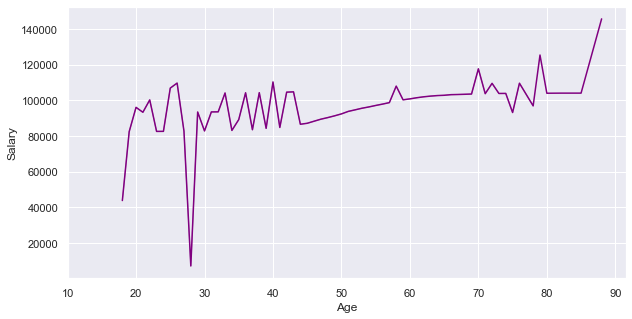

In [10]:
plt.figure(figsize=(10,5))                                                           # Setting Figure Size
sns.lineplot(x='Age',y='Salary',data=df,estimator=np.median,color='purple',ci=False) # Plotting line plot
plt.xticks([10,20,30,40,50,60,70,80,90])                                             # Setting X-ticks
plt.show()

# Between 20 to 30,there are no gradual increase or decrease.This could be due to the fact that people in this age group prepare for
# other competitive exams and they usually do part time job
# From age 40 there is gradual increase in salary
# So from this graph we can conclude Salary does not that much depends on Age also correlation between Salary and Age is 0.27
# Therefore Age column can also be removed

In [11]:
df=df.drop(['Business','Volume','Age'],axis=1)
df.head()

,Dependancies,Type,Billing,Salary,Base_pay,Bonus,Unit_Price,low,Unit_Sales,Total_Sales,Months,Education
0,No,Month-to-month,No,5089.00,2035.600,254.4500,3.77,3.65,18.25,18.80,0,High School or less
1,No,Month-to-month,No,5698.12,2279.248,284.9060,3.74,3.65,18.40,18.85,0,High School or less
2,No,Month-to-month,Yes,5896.65,2358.660,294.8325,3.89,3.72,18.70,18.90,0,High School or less
3,No,Month-to-month,Yes,6125.12,2450.048,306.2560,4.35,3.83,18.75,19.00,0,High School or less
4,No,Month-to-month,Yes,6245.00,2498.000,312.2500,4.34,4.08,18.80,19.05,1,High School or less


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
Education
Graduation              94886.18
High School or less      7924.04
Intermediate             7474.94
PG                     107266.61
Name: Salary, dtype: float64


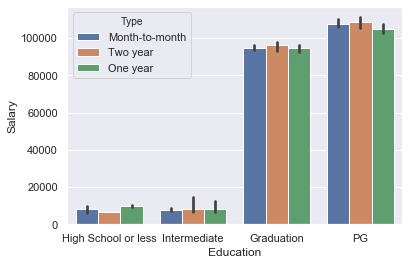

In [12]:
sns.barplot(x='Education',y='Salary',data=df,hue='Type',estimator=np.median)
print(np.round(df.groupby('Education')['Salary'].median(),2))

# From the graph we can conclude that higher the education,higher is the salary of an employee
# There is no significant difference in salary for type of salary settlement. 
# Therefore dropping this column also as it is not providing any extra information about salary

In [13]:
df=df.drop('Type',axis=1)

#### Variation of Salary wrt Unit Sales

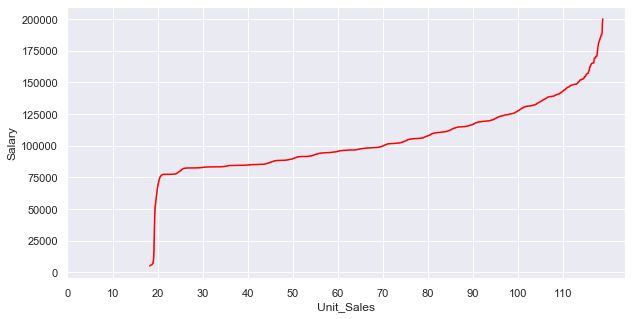

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Unit_Sales',y='Salary',data=df,estimator=np.median,color='red')
plt.xticks(range(0,120,10))
plt.show()

# Here we can see a gradual increase in salary as you make more sales
# From the graph we conclude that,higher the sales you make higher would be your salary.

#### Variation of Salary wrt Total Sales

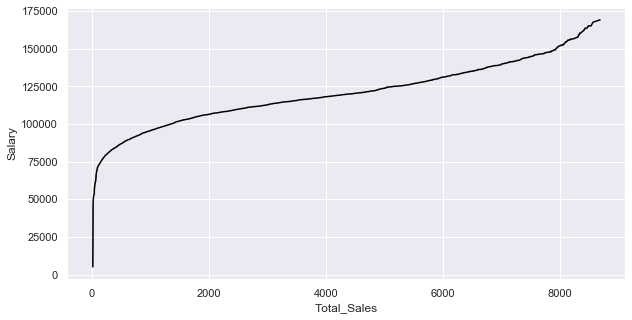

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Total_Sales',y='Salary',data=df,estimator=np.median,color='black')
plt.show()

# same result as that of between Unit sales and Salary
# More the sales you make ,more would be your salary

In [16]:
df[['Unit_Sales','Total_Sales']].corr()

,Unit_Sales,Total_Sales
Unit_Sales,1.000000,0.896115
Total_Sales,0.896115,1.000000


Here Total_Sales and Unit_Sales are giving almost same result.
And we can also see that they are internally correlated.
If we keep both of them in our dataset,we may face issue of Multicollinearity.
Therefore one of them should be removed from our dataset.
Since Unit Sales is having high correlation with Salary than that of Total Sales,we are going to remove Total_Sales from our Dataset

In [17]:
df=df.drop('Total_Sales',axis=1)

#### Variation of Salary wrt Month 

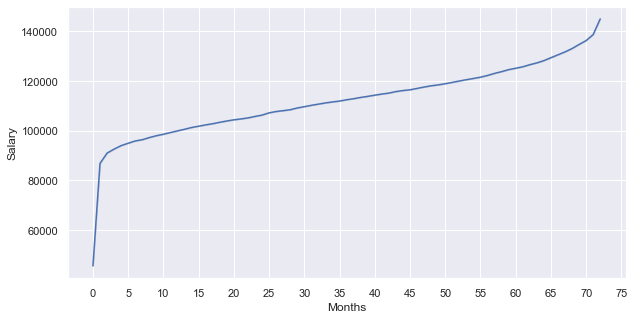

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Months',y='Salary',data=df,estimator=np.median,ci=False)
plt.xticks(range(0,80,5))
plt.show()

# Here also we are seeing gradual increase in salary


### Numerical Features
#### Extracting numerical feature to see if there are any outliers

In [19]:
# In our dataset,there are only to types of columns,Object and Numeric.
# so here we are considering the columns which are not having dtype as object are numeric.

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'low', 'Unit_Sales', 'Months']

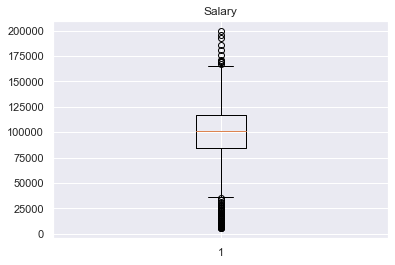

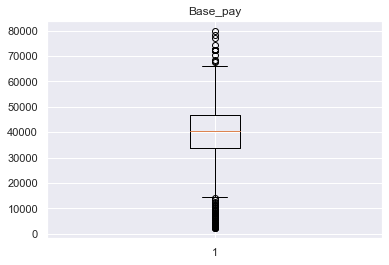

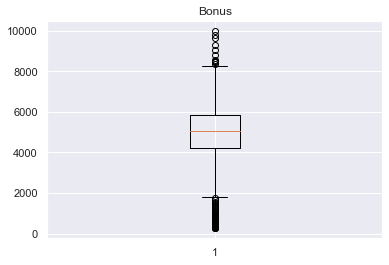

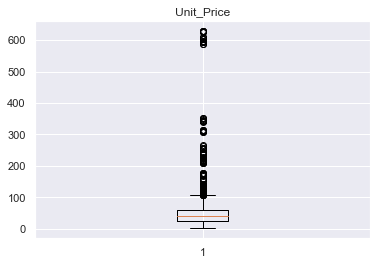

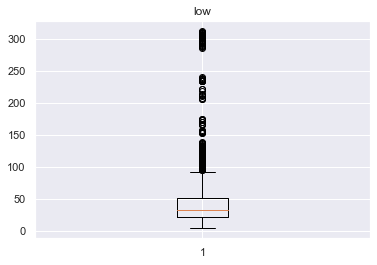

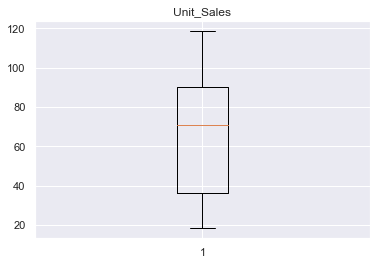

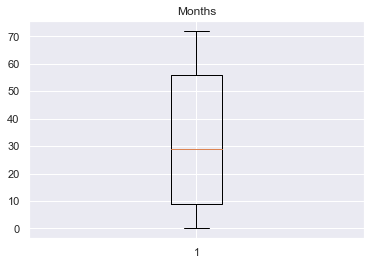

In [20]:
for feature in numerical_features:
    data=df.copy()                   # Copying dataset
    plt.boxplot(data[feature])       # Plotting boxplot  
    plt.title(feature)               # Setting Title
    plt.show()
    
    
# Here we can see,there are Outliers in our Dataset.

#### Percentage of Outliers
we are calculating percentage of outliers by Inter-Quantile Range(IQR) Method.

first defining 25 percentile and 75 percentile as quantile 1 and 3 resp.
Difference between quantile1 and quantile3 is interquantile range(IQR).
Lower limit is 1.5 times IQR below the quantile1 and upper limit is 1.5 times IQR above the quantile3.
Any data that exist outside this boundry is an outlier.

In [21]:
for feature in numerical_features:
    quantile1,quantile3=np.percentile(df[feature],[25,75])     # Defining the quantile ranges

    iqr=quantile3-quantile1                                    # Defining inter quantile range      
    lower_bound=quantile1-(1.5*iqr)                            # Defining lower bound of outliers
    upper_bound=quantile3+(1.5*iqr)                            # Defining upper bound of outliers
    percentage_outliers=(len(df[(df[feature]>upper_bound) | (df[feature]<lower_bound)])/df.shape[0])*100 #Defining % outliers.

    print('percentage outliers in {} is {:.2f}%'.format(feature,percentage_outliers))

    
    
# Percentage of outliers in some columns is greater than 5% ,so they need to be removed

percentage outliers in Salary is 1.55%
percentage outliers in Base_pay is 1.65%
percentage outliers in Bonus is 1.55%
percentage outliers in Unit_Price is 8.13%
percentage outliers in low is 7.95%
percentage outliers in Unit_Sales is 0.00%
percentage outliers in Months is 0.00%


#### Removing Outliers
Percentage of outliers is less than 10% therefore,removing them won't affect our analysis
And for regression model,outliers affect them drastically


In [22]:
for feature in numerical_features:
    quantile1,quantile3=np.percentile(df[feature],[25,75])     # Defining the quantile ranges

    iqr=quantile3-quantile1                                    # Defining inter quantile range      
    lower_bound=quantile1-(1.5*iqr)                            # Defining lower bound of outliers
    upper_bound=quantile3+(1.5*iqr)                            # Defining upper bound of outliers
    df=df[(df[feature]<=upper_bound)&(df[feature]>=lower_bound)]   # Taking only that data which is under the boundry we defined
    percentage_outliers=(len(df[(df[feature]>upper_bound) | (df[feature]<lower_bound)])/df.shape[0])*100 #Defining % outliers.


    print('percentage outliers in {} is {:.2f}'.format(feature,percentage_outliers))


percentage outliers in Salary is 0.00
percentage outliers in Base_pay is 0.00
percentage outliers in Bonus is 0.00
percentage outliers in Unit_Price is 0.00
percentage outliers in low is 0.00
percentage outliers in Unit_Sales is 0.00
percentage outliers in Months is 0.00


In [23]:
df.shape

# Here we can see 591 rows were removed from dataset.

(4409, 10)

#### Distribution of Numerical Features

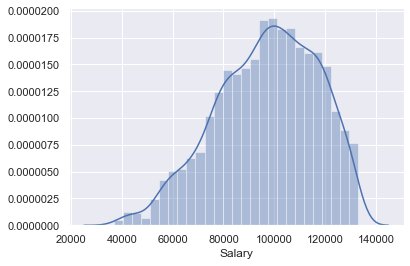

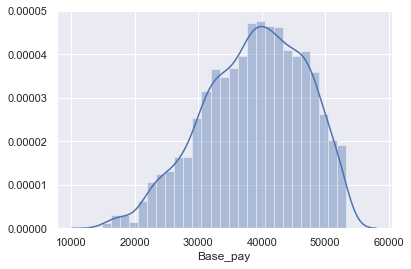

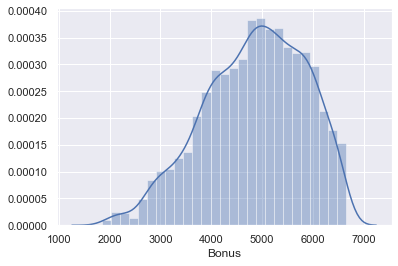

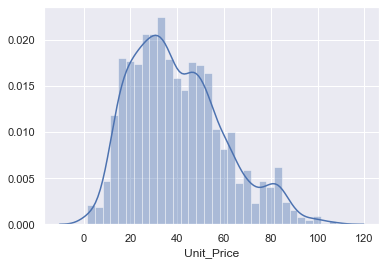

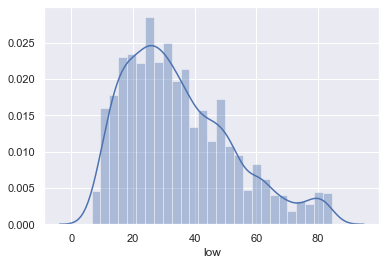

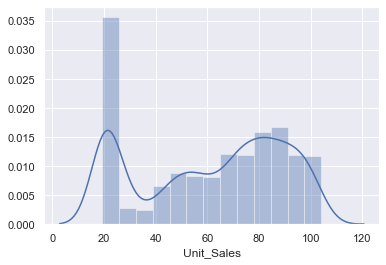

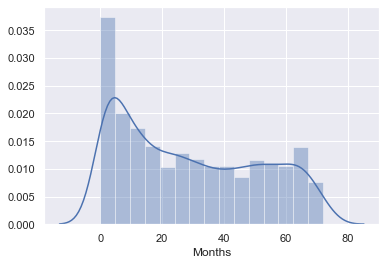

In [24]:
for feature in numerical_features:
    data=df.copy()
    sns.distplot(df[feature])
    plt.show()

#### Categorical Features

In [25]:
# Features which are having dtype as Object are Categorical features

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Dependancies', 'Billing', 'Education']

In [26]:
# Taking the Categorical data

categorical_data=df[categorical_features]
categorical_data

,Dependancies,Billing,Education
68,No,No,Graduation
69,No,No,Graduation
70,Yes,No,Graduation
71,No,Yes,Graduation
72,No,Yes,Graduation
...,...,...,...
4554,No,No,PG
4555,No,Yes,PG
4556,Yes,Yes,PG
4557,Yes,Yes,PG


In [27]:
for feature in categorical_data:
    print('Column: {}\n Value:{}\n'.format(feature,categorical_data[feature].value_counts()))
    
# Maximum Ratio of categories among features is around 2.5:1 which is not high  
# Therefore categorical data is Balanced as we can see.

Column: Dependancies
 Value:No     3109
Yes    1300
Name: Dependancies, dtype: int64

Column: Billing
 Value:Yes    2596
No     1813
Name: Billing, dtype: int64

Column: Education
 Value:PG            2479
Graduation    1930
Name: Education, dtype: int64



#### Creating dummy columns
Categorical features first need to converted into 0s and 1s before feeding them into our model.
Here we are using pd.get_dummies and we'll be dropping the first column. In case of binary data one column is enough to provide an information.
And since as the no of columns reduces,easy it would be for our model to get trained.


In [28]:
for feature in categorical_features:
    dummy=pd.get_dummies(categorical_data[feature],drop_first=True)   # Getting dummies out of categorical feature
    categorical_data=categorical_data.drop(feature,axis=1)            # Removing that categorical feature
    categorical_data=pd.concat([categorical_data,dummy],axis=1)       # Adding the dummy column to Categorical data.

categorical_data

,Yes,Yes,PG
68,0,0,0
69,0,0,0
70,1,0,0
71,0,1,0
72,0,1,0
...,...,...,...
4554,0,0,1
4555,0,1,1
4556,1,1,1
4557,1,1,1


In [29]:
# Giving new index to categorical Data,Since we want to concat it to numerical feature and concatenation happen with columns having same index.
categorical_data.index=range(4409)
categorical_data

,Yes,Yes,PG
0,0,0,0
1,0,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
4404,0,0,1
4405,0,1,1
4406,1,1,1
4407,1,1,1


In [30]:
# From earlier numerical features,some of the features have been removed.
# Therefore defining numerical features again.

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O' and feature not in 'Salary']

numerical_features

['Base_pay', 'Bonus', 'Unit_Price', 'low', 'Unit_Sales', 'Months']

In [31]:
numerical_data=df[numerical_features]
numerical_data.index=range(4409)


In [32]:
final_data=pd.concat([numerical_data,categorical_data],axis=1)
final_data

,Base_pay,Bonus,Unit_Price,low,Unit_Sales,Months,Yes,Yes,PG
0,14786.46538,1848.308173,40.970000,6.698333,19.30,1,0,0,0
1,15219.31691,1902.414614,40.940000,6.683333,19.30,1,0,0,0
2,15433.59406,1929.199258,6.940000,6.510000,19.30,1,1,0,0
3,15633.07536,1954.134420,7.240000,6.980000,19.30,1,0,1,0
4,15634.85534,1954.356918,51.849998,7.232857,19.30,1,0,1,0
...,...,...,...,...,...,...,...,...,...
4404,53089.51031,6636.188790,85.230003,83.779999,104.00,68,0,0,1
4405,53095.45863,6636.932330,85.059998,84.000000,104.05,68,0,1,1
4406,53098.04788,6637.255985,85.169998,83.879997,104.05,68,1,1,1
4407,53113.42734,6639.178415,85.660004,83.199997,104.05,68,1,1,1


In [33]:
y=df['Salary']
y.index=range(4409)
X=final_data

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Standard Scaler
In our Dataset the Difference in Magnitude among two different feature is high. 
In such situation,Model has tendency to get biased towards a feature having high magnitude.
To Overcome this issue,we use either Standardization or Normalisation.
Here we are using Standardization where in all numerical features will be Normally distributed with mean=0 and Standard Deviation=1.

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features]=scaler.fit_transform(X_test[numerical_features])

# Machine Learning
Evaluation metrics for this Dataset are R-2 score/Adjusted R-2,Root Mean Squared Error and Mean Absolute Error.
Problem with R-2 is,as you go on adding features to our model regardless of it being relevant or irrelevant,R-2 Score increases.
To overcome this issue,Adjusted R-2 Score is used

### Multiple Linear Regression
In Our Final Dataset there are 9 columns and thus 9 predictors for target value.
Therefore we are using Multiple Linear Regression.

In [51]:
from sklearn.linear_model import LinearRegression                              # Importing Linear Regression Model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error    # Importing Evaluation Metrics
lg=LinearRegression().fit(X_train,y_train)                                     # Defining and fitting the model.
y_pred=lg.predict(X_test)                                                      # Predicting the target value of test data.
r2=r2_score(y_test,y_pred)                                                     # Calculating R-2 Score
adjusted_r2=1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1)                        # Calculating Adjusted R-2 score
print(' Model: Multiple Linear Regression\n Adjusted R-2 Score: {}\n Root Mean Squared Error: {}'.format(adjusted_r2,np.sqrt(mean_squared_error(y_test,y_pred))))
print(' Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_pred)))

 Model: Multiple Linear Regression
 Adjusted R-2 Score: 0.9996837240189406
 Root Mean Squared Error: 354.0557292928593
 Mean Absolute Error: 54.21768934714422


Text(0.5, 1.0, 'Distribution of errors')

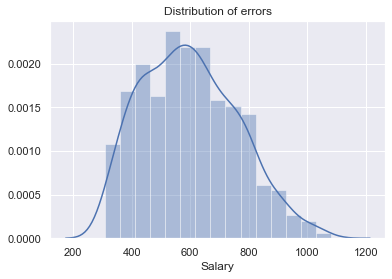

In [37]:
# Distribution of errors
sns.distplot(y_test-y_pred)
plt.title('Distribution of errors')

### Lasso Regression with Grid Search Cross-Validation
Here we are first finding best parameters for our regression model with the help of Grid Search Cross-Validation
then we will use those parameters in our fitted model.


Linear regression has a tendency to overfit the model.
To overcome this situation,Ridge and Lasso Regressors are used.
Here we are using Lasso Regressor since it automatically performs feature selection.
In our dataset,we have lots of independent feature therefore we are going with Lasso Regression.
Alpha-value is degree of regularization of model(generalisation of model).
Higher Alpha Value means higher regularization and thus simpler is the model


In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()     # Defining Lasso regressor
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}    # Defining parameters for our model.
lasso_regressor=GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)  
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)

{'alpha': 1e-10}


In [61]:
lasso=Lasso(alpha=1e-10).fit(X_train,y_train)
y_pred=lasso.predict(X_test)

r2=r2_score(y_test,y_pred)
adjusted_r2=1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1)

print(' Model: Lasso with GridSearchCV\n Adjusted R-2 Score: {}\n Root Mean Squared Error: {}'.format(adjusted_r2,np.sqrt(mean_squared_error(y_test,y_pred))))
print(' Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_pred)))

 Model: Lasso with GridSearchCV
 Adjusted R-2 Score: 0.9996837240182245
 Root Mean Squared Error: 354.0557296937017
 Mean Absolute Error: 54.21768476117361


Text(0.5, 1.0, 'Distribution of errors')

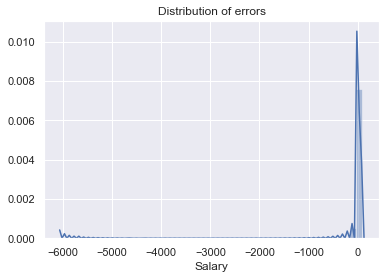

In [62]:
sns.distplot(y_test-y_pred)
plt.title('Distribution of errors')

### Random Forest
Random Forest uses multiple trees and takes the average of final outcome from each tree,which makes it better regressor than Decision Tree Regressor. And therefore using Random Forest



In [56]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(X_train,y_train)
y_pred=rf.predict(X_test)

r2=r2_score(y_test,y_pred)
adjusted_r2=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(' Model: Random Forest\n Adjusted R-2 Score: {}\n Root Mean Squared Error: {}'.format(adjusted_r2,np.sqrt(mean_squared_error(y_test,y_pred))))
print(' Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_pred)))

 Model: Random Forest
 Adjusted R-2 Score: 0.9999950622161797
 Root Mean Squared Error: 44.23892415726251
 Mean Absolute Error: 19.775380992064594


Evaluating the maximum depth and Root Mean Squared Error for that depth


In [57]:
Adjusted_r2=[]     # First Defining empty list  of adjusted r2 and rmse to add adjusted r2 score and rmse later on.
rmse=[]
for i in range(1,10):         # We are going to evaluate for 1 to 10 as maximum depth of tree.
    rf=RandomForestRegressor(max_depth=i).fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    r2=r2_score(y_test,y_pred)
    Adjusted_r2.append((1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)))     # Adding adjusted r2 value to empty list of adjusted r2.
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))             # Adding rmse value to empty list of rmse.
    

Text(0.5, 0, 'Depth of Tree')

<Figure size 7200x360 with 0 Axes>

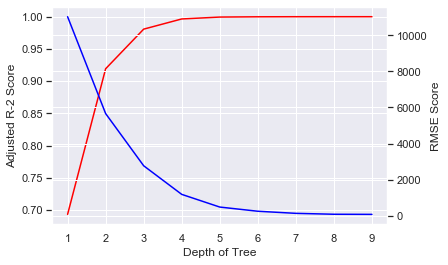

In [58]:
# Plotting the Adjusted R-2 score and its corresponding RMSE.

plt.figure(figsize=(100,5))
fig,ax1=plt.subplots()
ax1.plot(range(1,10),Adjusted_r2,color='red')
ax1.set_ylabel('Adjusted R-2 Score')
ax1.set_xlabel('Depth of Tree')

ax2=ax1.twinx()
ax2.plot(range(1,10),rmse,color='blue')
ax2.set_ylabel('RMSE Score')
ax2.set_xlabel('Depth of Tree')

From the graph max depth=5 seems to be best among all.
Since Adjusted r2 score and its corresponding root mean squared error is acceptable

In [59]:
rf=RandomForestRegressor(max_depth=5).fit(X_train,y_train)
y_pred=rf.predict(X_test)

r2=r2_score(y_test,y_pred)
adjusted_r2=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(' Model: Random Forest\n Adjusted R-2 Score: {:.2f}\n Root Mean Squared Error: {:.2f}'.format(adjusted_r2,np.sqrt(mean_squared_error(y_test,y_pred))))

 Model: Random Forest
 Adjusted R-2 Score: 1.00
 Root Mean Squared Error: 489.75


Text(0.5, 1.0, 'Distribution of errors')

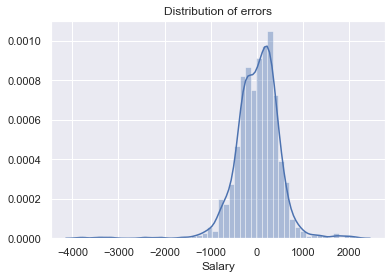

In [60]:
sns.distplot(y_test-y_pred)
plt.title('Distribution of errors')

### Linear Regression with Principle Component Analysis(PCA)
PCA reduces the no of features.
It detects the internally correlated features and group them together.
And as the no of predictors are less,more generalised would be our model.

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)         # No of components we want after PCA is 2
pca.fit(final_data)
x_pca=pca.transform(final_data)  # Transforming the data
x_pca.shape

(4409, 2)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=0)

In [48]:
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

r2=r2_score(y_test,y_pred)
adjusted_r2=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(' Model: PCA,Linear Regression\n Adjusted R-2 Score: {:.2f}\n Root Mean Squared Error: {:.2f}'.format(adjusted_r2,np.sqrt(mean_squared_error(y_test,y_pred))))
print(' Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test,y_pred)))

 Model: PCA,Linear Regression
 Adjusted R-2 Score: 1.00
 Root Mean Squared Error: 354.06
 Mean Absolute Error: 54.22


Text(0.5, 1.0, 'Distribution of Error')

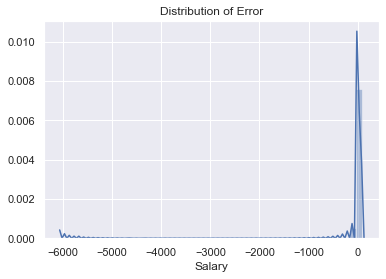

In [49]:
sns.distplot(y_test-y_pred)
plt.title('Distribution of Error')